In [1]:
!pip install Dash

import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import Dash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 15.6 MB/s 
     |████████████████████████████████| 357 kB 44.0 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  


In [2]:
app = dash.Dash(__name__)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
DATA = pd.read_excel('/content/drive/MyDrive/ACCIDENTALIDAD_BARRANQUILLA.xlsx')

In [7]:
DATA.head()

,AÑO_ACCIDENTE,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES
0,2.018,Marzo,Pasajero,herido,Choque,PUBLICO,BUSETA,M,1.0,1.0,3.0
1,2.018,Junio,Pasajero,herido,Choque,PUBLICO,AUTOMOVIL,F,1.0,1.0,6.0
2,2.018,Marzo,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,10.0,1.0,3.0
3,2.018,Abril,Acompañante,herido,Choque,PARTICULAR,AUTOMOVIL,M,10.0,1.0,4.0
4,2.018,Mayo,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,10.0,1.0,5.0


In [8]:
available_CLASE_VEHICULO_ACCIDENTE = DATA['CLASE_VEHICULO_VICTIMA'].unique()
available_SEXO_VICTIMA = DATA["SEXO_VICTIMA"].unique()

In [9]:
tab = DATA['CLASE_VEHICULO_VICTIMA'].value_counts().rename_axis('label').reset_index(name='counts')
tab

,label,counts
0,MOTOCICLETA,2051
1,AUTOMOVIL,735
2,BUS,232
3,CAMIONETA,129
4,BUSETA,96
5,BICICLETA,87
6,OTROS,74
7,MICROBUS,60
8,CAMION,28
9,CAMPERO,20


In [10]:
fig2 = go.Figure(data=[go.Pie(labels=tab['label'], values=tab['counts'], hole=.3)])
fig2

In [11]:
g1 = px.density_heatmap(DATA, x="SEXO_VICTIMA", y="CLASE_VEHICULO_VICTIMA")
g1

In [12]:
import seaborn as sns

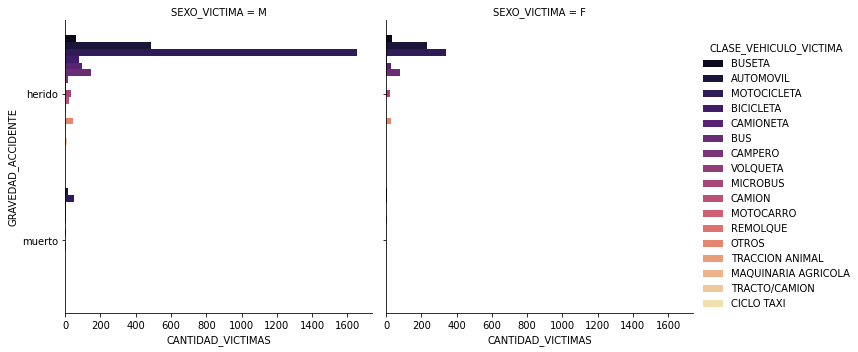

In [13]:
sns.catplot(data = DATA,
            kind = "bar",
            estimator = sum,
            x = "CANTIDAD_VICTIMAS",
            y = "GRAVEDAD_ACCIDENTE",
            hue = "CLASE_VEHICULO_VICTIMA",
            col = "SEXO_VICTIMA",
            palette = 'magma',
            ci = None)

In [14]:
html.P(
    children="ACCIDENTALIDAD VEHICULAR EN LA CIUDAD DE BARRANQUILLA ENTRE LOS AÑOS 2016 Y 2018"
),
html.P(
    children=" La base de datos se tomó del portal web de datos abiertos Colombia"
    "Se cuenta con 10 variables y 3540 registros"
)

P(' La base de datos se tomó del portal web de datos abiertos ColombiaSe cuenta con 10 variables y 3540 registros')

In [15]:
html.P(
    children="Visualizaciones"
)

P('Visualizaciones')

In [16]:
html.Div([
          html.H1(children='Gráfico 1. Donut Chart'),
          html.Div(children='''
          En esta gráfica podemos ver el porcentaje de los accidentes que pertenece a cada vehiculo incluido en el estudio.
          '''),
          dcc.Dropdown(
              id='crossfilter_SEXO_VICTIMA',
              options=[{'label': i, 'value': i} for i in available_SEXO_VICTIMA]
              ),
          dcc.Graph(
              id='g2'
          )
          ])

Div([H1('Gráfico 1. Donut Chart'), Div('\n          En esta gráfica podemos ver el porcentaje de los accidentes que pertenece a cada vehiculo incluido en el estudio.\n          '), Dropdown(options=[{'label': 'M', 'value': 'M'}, {'label': 'F', 'value': 'F'}], id='crossfilter_SEXO_VICTIMA'), Graph(id='g2')])

In [17]:
html.Div([
          html.H2(children='Gráfico 2. heat map'),
          dcc.Graph(
              id='g3',
              figure=g1
              ),
          ],)

Div([H2('Gráfico 2. heat map'), Graph(id='g3', figure=Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'SEXO_VICTIMA=%{x}<br>CLASE_VEHICULO_VICTIMA=%{y}<br>count=%{z}<extra></extra>',
              'name': '',
              'type': 'histogram2d',
              'x': array(['M', 'F', 'M', ..., 'F', 'M', 'M'], dtype=object),
              'xaxis': 'x',
              'xbingroup': 'x',
              'y': array(['BUSETA', 'AUTOMOVIL', 'MOTOCICLETA', ..., 'AUTOMOVIL', 'MOTOCICLETA',
                          'MOTOCICLETA'], dtype=object),
              'yaxis': 'y',
              'ybingroup': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'count'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.44

In [18]:
@app.callback(
    dash.dependencies.Output('g3', 'figure'),
    [dash.dependencies.Input('crossfilter_CLASE_VEHICULO_ACCIDENTE', 'value')]
    )
def update_graph(CLASE_VEHICULO_ACCIDENTE_value):
  cant_CLASE_VEHICULO_ACCIDENTE = cant[cant['CLASE_VEHICULO_ACCIDENTE'] == CLASE_VEHICULO_ACCIDENTE_value]
  fig4 = px.scatter_geo(cant_CLASE_VEHICULO_ACCIDENTE,
                      lat='y_geo',
                      lon='x_geo',
                      size="CANTIDAD_VICTIMAS",
                      center = {"lat": 10.9878, "lon": -74.7889})
  fig4.update_layout(
      title_text = 'Cantidad de accidentes',
      showlegend = True,
      geo = dict( scope = 'europe',
                 landcolor = 'rgb(217, 217, 217)'
                 )
  )
  
  return fig4 

In [19]:
@app.callback(
    dash.dependencies.Output('g2', 'figure'),
    [dash.dependencies.Input('crossfilter_SEXO_VICTIMA', 'value')]
    )
def update_graph(SEXO_VICTIMA_value):
  cant_SEXO_VICTIMA = cant1[cant1['SEXO_VICTIMA'] == SEXO_VICTIMA_value]
  fig3 = px.scatter_geo(cant_SEXO_VICTIMA,
                        lat='y_geo',
                        lon='x_geo',
                        size="SEXO_VICTIMAS",
                        center = {"lat": 10.9878, "lon": -74.7889})
  return fig3 

In [20]:
if __name__ == "__main__":
  app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

